In [142]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import math

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [144]:
bnifty = pd.read_csv('banknifty_master.csv',low_memory=False,header=None,on_bad_lines='skip',names=["Strike", "Date", "Time", "Open","High","Low","Close","Volume"])
bnifty['intTime']=bnifty['Time'].apply(lambda x:int(x[3:]))
bnifty = bnifty[bnifty.intTime % 5 == 0]
bnifty = bnifty[bnifty.Time != '09:15']
bnifty = bnifty[bnifty.Time != '15:30']
bnifty.reset_index(inplace=True)
bnifty.drop('index',axis=1,inplace=True)

In [145]:
bnifty

,Strike,Date,Time,Open,High,Low,Close,Volume,intTime
0,25300CE,2018/05/02,09:20,311.55,325.90,311.55,322.30,480,20
1,25300PE,2018/05/02,09:20,15.15,15.20,13.60,15.00,53000,20
2,25400CE,2018/05/02,09:20,228.00,241.00,228.00,230.00,5440,20
3,25400PE,2018/05/02,09:20,27.00,27.00,23.70,26.65,52320,20
4,25500CE,2018/05/02,09:20,153.20,163.80,153.20,156.00,27320,20
...,...,...,...,...,...,...,...,...,...
791581,22500PE,2020/09/17,15:25,176.60,178.45,176.05,177.75,37425,25
791582,22600CE,2020/09/17,15:25,0.20,0.35,0.15,0.15,337850,25
791583,22600PE,2020/09/17,15:25,275.95,278.75,275.90,277.75,25050,25
791584,22700CE,2020/09/17,15:25,0.10,0.25,0.10,0.15,174900,25


In [147]:
bniftyu = pd.read_csv('BNF_2010_2020.csv',low_memory=False,on_bad_lines='skip')
bniftyu = bniftyu[(bniftyu.Date >= 20180502) & (bniftyu.Date <=20200917)]
bniftyu['intTime']=bniftyu['Time'].apply(lambda x:int(x[3:]))
bniftyu = bniftyu[bniftyu.intTime % 5 == 0]
bniftyu = bniftyu[bniftyu.Time != '09:15']
bniftyu = bniftyu[bniftyu.Time != '15:30']
bniftyu['Date']=bniftyu['Date'].astype(str)
bniftyu['Date']=bniftyu['Date'].apply(lambda x:x[:4]+'/'+x[4:6]+'/'+x[6:])
missingdates=list(set(bniftyu['Date']) - set(bnifty['Date']))
bniftyu=bniftyu[~bniftyu['Date'].isin(missingdates)]
bniftyu.reset_index(inplace=True)
bniftyu.drop('index',axis=1,inplace=True)

In [148]:
list(set(bniftyu['Date']) - set(bnifty['Date']))

[]

In [149]:
bnifty[(bnifty['Date']=='2020/09/14') & (bnifty['Strike']=='22700CE')]

,Strike,Date,Time,Open,High,Low,Close,Volume,intTime
785929,22700CE,2020/09/14,09:20,302.45,314.85,297.05,306.75,96525,20
785955,22700CE,2020/09/14,09:25,324.20,334.00,324.20,330.10,102500,25
785980,22700CE,2020/09/14,09:30,307.15,318.10,307.05,312.70,37325,30
786006,22700CE,2020/09/14,09:35,286.50,289.70,281.70,285.00,53500,35
786030,22700CE,2020/09/14,09:40,300.10,303.00,292.60,295.25,32425,40
...,...,...,...,...,...,...,...,...,...
787627,22700CE,2020/09/14,15:05,169.75,175.00,169.35,171.25,20400,5
787653,22700CE,2020/09/14,15:10,160.75,162.15,151.55,151.65,39325,10
787679,22700CE,2020/09/14,15:15,153.70,154.45,148.00,151.65,27050,15
787705,22700CE,2020/09/14,15:20,144.80,147.00,139.60,140.45,42375,20


In [150]:
bniftyu[(bniftyu['Date']=='2020/09/14')]

,Instrument,Date,Time,Open,High,Low,Close,intTime
42404,BANKNIFTY,2020/09/14,09:20,22673.50,22673.50,22646.25,22654.70,20
42405,BANKNIFTY,2020/09/14,09:25,22688.50,22728.95,22683.35,22727.75,25
42406,BANKNIFTY,2020/09/14,09:30,22680.35,22690.00,22666.65,22668.95,30
42407,BANKNIFTY,2020/09/14,09:35,22627.60,22627.60,22580.90,22617.35,35
42408,BANKNIFTY,2020/09/14,09:40,22617.75,22649.05,22612.45,22632.80,40
...,...,...,...,...,...,...,...,...
42473,BANKNIFTY,2020/09/14,15:05,22204.65,22206.75,22175.95,22179.75,5
42474,BANKNIFTY,2020/09/14,15:10,22114.05,22132.95,22106.30,22132.95,10
42475,BANKNIFTY,2020/09/14,15:15,22109.95,22115.40,22089.95,22110.40,15
42476,BANKNIFTY,2020/09/14,15:20,22055.85,22078.20,22048.65,22073.85,20


In [199]:
# sbnifty.drop('intTime',axis=1,inplace=True)

In [14]:
# # Creating Subplots
# fig, ax = plt.subplots(figsize=(15,10))

# candlestick_ohlc(ax, sbnifty[:100].values, width=0.6, colorup='green', colordown='red', alpha=0.8)
# #plt.plot(bnifty[:100]['Date'],(bnifty['Close'][::-1].rolling(20).mean())[-100:][::-1])
# # Setting labels & titles
# ax.set_xlabel('Date')
# ax.set_ylabel('Price')
# fig.suptitle('Daily Candlestick Chart of bnifty50')

# # Formatting Date
# #fig.tight_layout()

In [201]:
# bnifty.reset_index(inplace=True)
# bnifty.drop('index',axis=1,inplace=True)

In [526]:
bnifty['Date'] = bnifty['Date'].apply(mpl_dates.num2date)

In [528]:
flag=0
profit=0
loss=0
startyear=2020
a=bnifty.loc[bnifty['Date'].apply(lambda x:str(x).startswith(str(startyear)))].index[0]
ini=100000
balance=ini
minbalance=ini
maxbalance=0
bal=[]
for i in range(len(bnifty['Close'][a:])):
    bal.append(balance)
    n=int(balance/bnifty['Close'][i+a])
    if flag==0 and bnifty['Close'][i+a]>=bnifty['Close'].rolling(20).mean()[i+a]:
        buy=bnifty['Close'][i+a]
        #print("buy on ",str(bnifty['Date'][i+a])[:11])
        flag=1
    if flag==1 and bnifty['Close'][i+a]<bnifty['Close'].rolling(20).mean()[i+a]:
        sell=bnifty['Close'][i+a]
        #print("sell on ",str(bnifty['Date'][i+a])[:11])
        flag=2
    if flag==2:
        if sell>=buy:
            balance=balance+n*5*(sell-buy)
            #print("Profit of ₹{:.2f} with {:.2f}% on {} for bnifty50 price {}".format(n*(sell-buy),500*(sell-buy)/buy,str(bnifty['Date'][i+a])[:11],bnifty['Close'][i+a]))
        else:
            balance=balance-n*5*(buy-sell)
            #print("Loss of ₹{:.2f} with {:.3f}% on {} for bnifty50 price {}".format(n*(buy-sell),500*(buy-sell)/buy,str(bnifty['Date'][i+a])[:11],bnifty['Close'][i+a]))
        flag=0
        if balance>=maxbalance:
            maxbalance=balance
        else:
            minbalance=balance
    if balance<0:
        print("Total Loss")
        break

res=(balance-ini)/ini
if balance>=ini:
    print("Final Balance is ₹{:.2f} with return of {:.2f}% with cagr of {:.2f}%".format(balance,res*100,(10**(math.log((1+res),10)/(2022-startyear))-1)*100))
else:
    print("Final Balance is ₹{:.2f} with a loss of {:.2f} at {:.2f}%".format(balance,ini-balance,100*(ini-balance)/ini))

ren=(bnifty['Close'][i+a]-bnifty['Close'][a])/bnifty['Close'][a]
print("bnifty Return for the while is {:.2f}% with cagr of {:.2f}%".format(100*ren,(10**(math.log((1+ren),10)/(2022-startyear))-1)*100))
print("Minimum Balance was ₹{:.2f} and Maximum Balance was ₹{:.2f}".format(minbalance,maxbalance))

Final Balance is ₹201978.50 with return of 101.98% with cagr of 42.12%
Nifty Return for the while is 31.06% with cagr of 14.48%
Minimum Balance was ₹201978.50 and Maximum Balance was ₹237052.25


In [529]:
bnifty['bala']=bnifty['Close']*(ini/bnifty['Close'][a])

In [530]:
bnifty['Date']=pd.to_datetime(bnifty['Date'])
bnifty['Date'] = bnifty['Date'].apply(mpl_dates.date2num)

In [533]:
bnifty

,Date,Open,High,Low,Close,bala,sma
0,9437.0,994.20,1000.91,992.69,1000.00,8208.495793,NaN
1,9440.0,1001.53,1001.53,988.92,988.92,8117.545660,NaN
2,9441.0,987.17,987.17,977.05,978.22,8029.714755,NaN
3,9442.0,976.28,976.28,962.98,964.01,7913.072030,NaN
4,9443.0,960.32,960.32,952.13,953.07,7823.271086,NaN
...,...,...,...,...,...,...,...
6638,19180.0,16113.75,16150.50,16045.95,16132.90,132426.841781,129863.020317
6639,19181.0,16273.65,16275.50,16157.90,16220.60,133146.726862,129870.783311
6640,19184.0,16136.15,16248.55,16115.50,16216.00,133108.967782,130053.131088
6641,19185.0,16126.20,16158.75,16031.15,16058.30,131814.487995,130187.827295


In [532]:
bnifty['sma']=bnifty['Close'].rolling(20).mean()
bnifty['sma']=bnifty['sma']*(ini/bnifty['sma'][a])

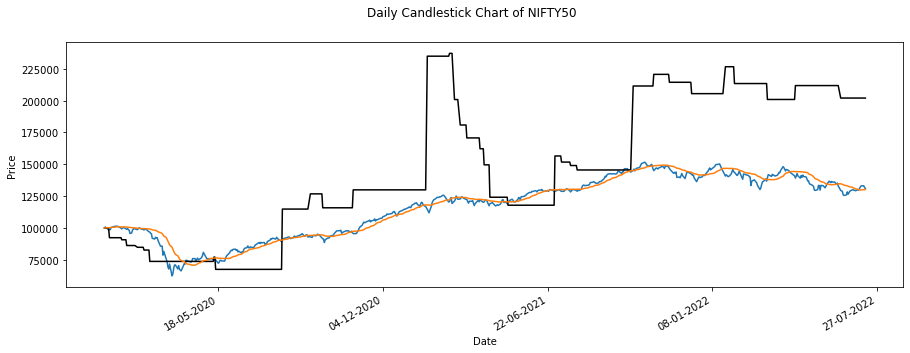

In [534]:
# Creating Subplots
fig, ax = plt.subplots(figsize=(15,5))

#candlestick_ohlc(ax, bnifty[a:].values, width=0.6, colorup='green', colordown='red', alpha=0.8)
plt.plot(bnifty[a:]['Date'], bnifty[a:]['bala'])
plt.plot(bnifty[a:]['Date'], bal,'k')
plt.plot(bnifty[a:]['Date'], bnifty[a:]['sma'])
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of bnifty50')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

#fig.tight_layout()len(bal)